# Introduction to Morphological Processing

``Morphology`` comes from the Greek word ``morphē``, which means form or shape and ``logos``, which means study.
The term ``Morphology`` has been used in biology that deals with the study of the form and structure of organisms
since the 17th century. The concept of Mathematical Morphology was given in the mid-sixties by Georges Matheron
and Jean Serra of the Paris School of Mines in Fontainebleau, France. Then, in the 70s, it was used for image
analysis research in the area of microscopic imaging in Europe.

In the field of image processing, morphological processing is a technique that deals with the shape and structure
of an object. It is a non-linear operation that transforms an image using a structuring element. The structuring
element is a small binary image that is used to scan the input image. The structuring element is placed at all
possible locations in the input image and the output image is obtained by comparing the input image with the
structuring element.

Morphological processing is used for various image processing tasks such as noise removal, image enhancement,
edge detection, image segmentation, and image analysis. It is widely used in the field of computer vision and
machine learning.

There are two basic operations in morphological processing: **Erosion** and **Dilation**. These operations can
then be combined to form more complex operations such as **Opening** and **Closing**.

# Setup

In [ ]:
%pip install opencv-python opencv-contrib-python matplotlib

# Initial Setup

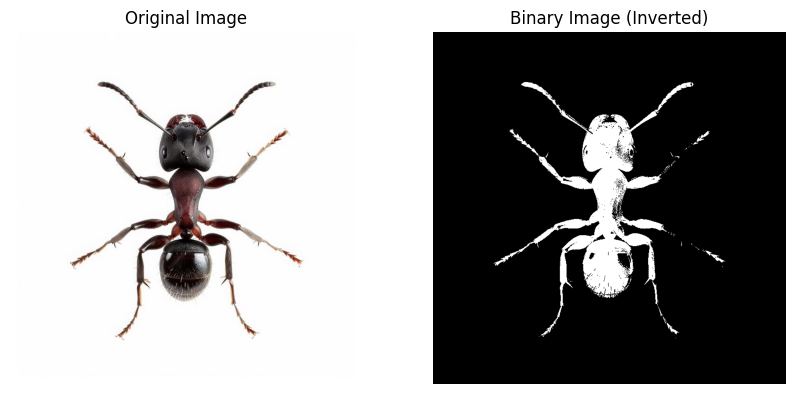

In [32]:
# Import Libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Asset Root
asset_root = os.path.join(os.getcwd(), '../../assets')

# Image Path
image_path = os.path.join(asset_root, 'images', 'black_ant_2.jpg')

# Read Image and convert to RGB
input_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

# Binary Image
binary_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
binary_image = cv2.normalize(binary_image, None, 0, 1, cv2.NORM_MINMAX)

# Invert Binary Image
binary_image = 1 - binary_image

# Display Both Image
plt.figure("Morphological Processing", figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image (Inverted)")
plt.axis('off')

plt.show()

# Erosion

``Erosion`` is a morphological operation that shrinks the boundaries of the object in an image. It is used to remove
small objects from an image. The erosion operation is performed by placing the structuring element at all possible
locations in the input image and the output image is obtained by comparing the input image with the structuring
element. If the pixel values of the input image and the structuring element are both 1, then the output pixel
value is 1, otherwise, it is 0.

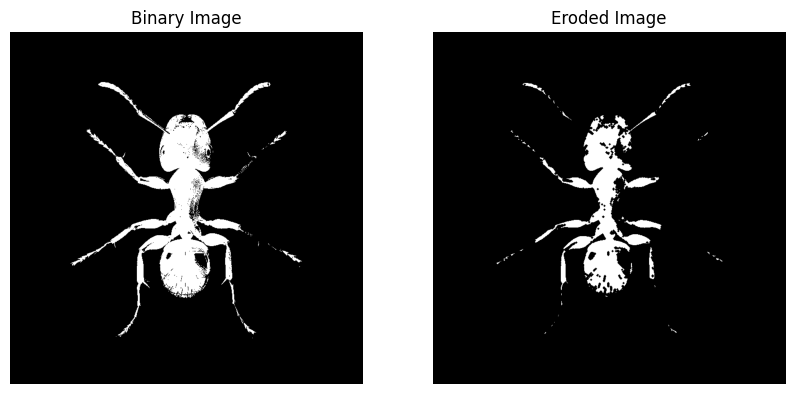

In [22]:
# Create a Structuring Element
kernel = np.array([[0, 0, 1, 0, 0],
                   [0, 1, 1, 1, 0],
                   [1, 1, 1, 1, 1],
                   [0, 1, 1, 1, 0],
                   [0, 0, 1, 0, 0]], dtype=np.uint8)

# Erosion
eroded_image_1 = cv2.erode(binary_image, kernel, iterations=1)

# Display Both Image
plt.figure("Erosion", figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(eroded_image_1, cmap='gray')
plt.title("Eroded Image")
plt.axis('off')

plt.show()

The above image shows the result of the erosion operation on the binary image. The structuring element used for
the erosion operation is a 5x5 matrix with a cross-shaped pattern.

$$
\begin{bmatrix}
0 & 0 & 1 & 0 & 0 \\
0 & 1 & 1 & 1 & 0 \\
1 & 1 & 1 & 1 & 1 \\
0 & 1 & 1 & 1 & 0 \\
0 & 0 & 1 & 0 & 0 \\
\end{bmatrix}
$$

As we can see, the boundaries of the ant in the binary image have been shrunk after the erosion operation.
When the erosion operation is applied, some of the pixels in the object are removed, which results in the
shrinkage of the object boundaries. Thus, some of the small objects in the image are removed by the erosion operation,
which results in some loss of information.

# Dilation

``Dilation`` is a morphological operation that expands the boundaries of the object in an image. It is used to
increase the size of the objects in an image. The dilation operation is performed by placing the structuring
element at all possible locations in the input image and the output image is obtained by comparing the input
image with the structuring element. If the pixel values of the input image and the structuring element are both
1, then the output pixel value is 1, otherwise, it is 0.

The dilation operation is the opposite of the erosion operation. It is used to fill the holes in an object and
to connect the broken parts of an object.

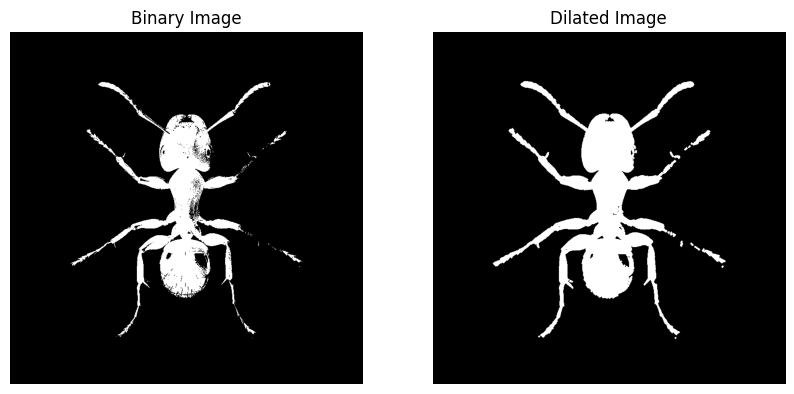

In [24]:
# Create a Structuring Element
kernel = np.array([[0, 0, 1, 0, 0],
                   [0, 1, 1, 1, 0],
                   [1, 1, 1, 1, 1],
                   [0, 1, 1, 1, 0],
                   [0, 0, 1, 0, 0]], dtype=np.uint8)

# Dilation
dilated_image_1 = cv2.dilate(binary_image, kernel, iterations=1)

# Display Both Image
plt.figure("Dilation", figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image_1, cmap='gray')
plt.title("Dilated Image")
plt.axis('off')

plt.show()

The above image shows the result of the dilation operation on the binary image. The structuring element used for
the dilation operation is a 5x5 matrix with a cross-shaped pattern.

$$
\begin{bmatrix}
0 & 0 & 1 & 0 & 0 \\
0 & 1 & 1 & 1 & 0 \\
1 & 1 & 1 & 1 & 1 \\
0 & 1 & 1 & 1 & 0 \\
0 & 0 & 1 & 0 & 0 \\
\end{bmatrix}
$$

As we can see, the boundaries of the ant in the binary image have been expanded after the dilation operation.
Some of the holes in the ant have also been filled. Also, some of the broken parts of the ant have been connected.

# Opening

``Opening`` is a morphological operation that combines the erosion operation followed by the dilation operation.
It is used to remove small objects from an image while preserving the shape and size of the larger objects.
The opening operation is performed by applying the erosion operation first and then the dilation operation.

The opening operation is used to remove noise from an image and to separate the objects that are touching each other.

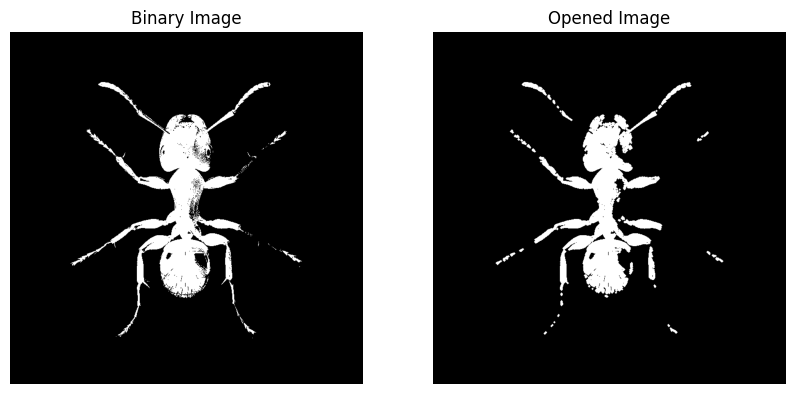

In [27]:
# Create a Structuring Element
kernel = np.array([[0, 0, 1, 0, 0],
                   [0, 1, 1, 1, 0],
                   [1, 1, 1, 1, 1],
                   [0, 1, 1, 1, 0],
                   [0, 0, 1, 0, 0]], dtype=np.uint8)

# Opening
opened_image_1 = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel, iterations=1)

# Display Both Image
plt.figure("Opening", figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(opened_image_1, cmap='gray')
plt.title("Opened Image")
plt.axis('off')

plt.show()

The above image shows the result of the opening operation on the binary image. The structuring element used for
the opening operation is a 5x5 matrix with a cross-shaped pattern.

$$
\begin{bmatrix}
0 & 0 & 1 & 0 & 0 \\
0 & 1 & 1 & 1 & 0 \\
1 & 1 & 1 & 1 & 1 \\
0 & 1 & 1 & 1 & 0 \\
0 & 0 & 1 & 0 & 0 \\
\end{bmatrix}
$$

As we can see, the small objects in the binary image have been removed after the opening operation. The shape
and size of the larger objects have been preserved. The opening operation is used to remove noise from an image
and to separate the objects that are touching each other.

# Closing

``Closing`` is a morphological operation that combines the dilation operation followed by the erosion operation.
It is used to remove holes from an image while preserving the shape and size of the larger objects. The closing
operation is performed by applying the dilation operation first and then the erosion operation.

The closing operation is used to fill the holes in an object and to connect the broken parts of an object.

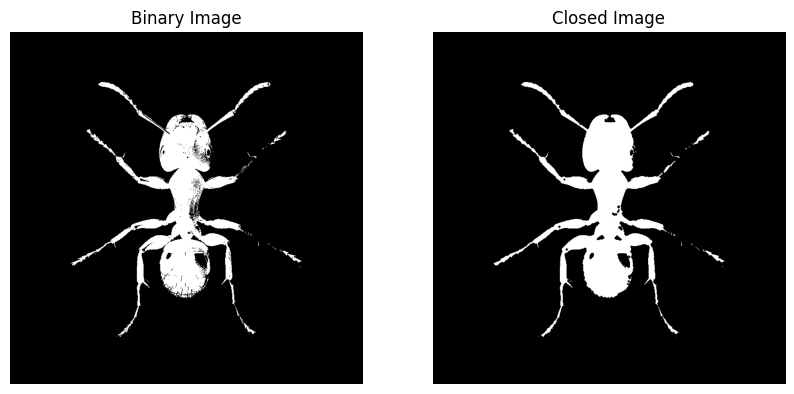

In [29]:
# Create a Structuring Element
kernel = np.array([[0, 0, 1, 0, 0],
                   [0, 1, 1, 1, 0],
                   [1, 1, 1, 1, 1],
                   [0, 1, 1, 1, 0],
                   [0, 0, 1, 0, 0]], dtype=np.uint8)

# Closing
closed_image_1 = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel, iterations=1)

# Display Both Image
plt.figure("Closing", figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(closed_image_1, cmap='gray')
plt.title("Closed Image")
plt.axis('off')

plt.show()

The above image shows the result of the closing operation on the binary image. The structuring element used for
the closing operation is a 5x5 matrix with a cross-shaped pattern.

$$
\begin{bmatrix}
0 & 0 & 1 & 0 & 0 \\
0 & 1 & 1 & 1 & 0 \\
1 & 1 & 1 & 1 & 1 \\
0 & 1 & 1 & 1 & 0 \\
0 & 0 & 1 & 0 & 0 \\
\end{bmatrix}
$$

As we can see, the holes in the binary image have been filled after the closing operation. The broken parts of
the ant have also been connected. The closing operation is used to fill the holes in an object and to connect
the broken parts of an object.

# Comparison of Morphological Operations

The following image shows the comparison of the original binary image with the eroded, dilated, opened, and closed images.

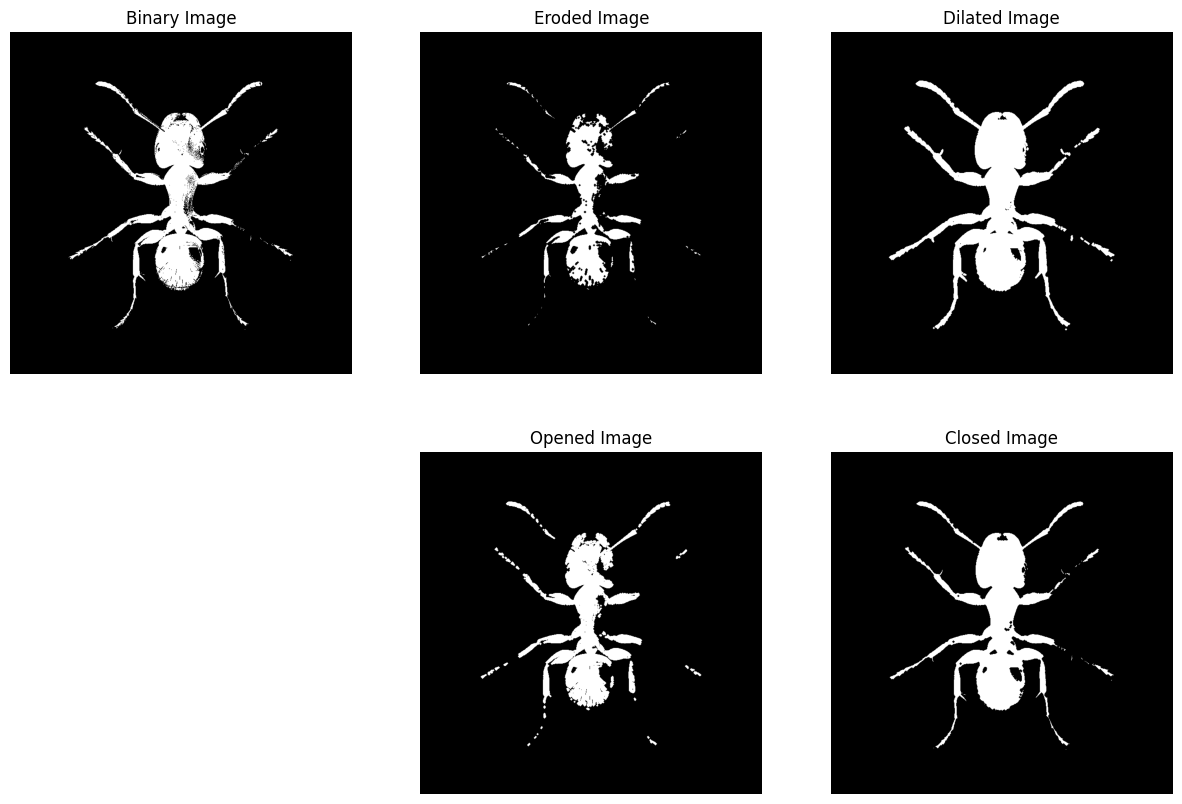

In [31]:
plt.figure("Comparison of Morphological Operations", figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(eroded_image_1, cmap='gray')
plt.title("Eroded Image")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(dilated_image_1, cmap='gray')
plt.title("Dilated Image")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(opened_image_1, cmap='gray')
plt.title("Opened Image")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(closed_image_1, cmap='gray')
plt.title("Closed Image")
plt.axis('off')

plt.show()

# Summary

- ``Morphological processing`` is a technique that deals with the shape and structure of an object in an image.
- The two basic operations in morphological processing are ``Erosion`` and ``Dilation``.
- The ``Erosion`` operation shrinks the boundaries of the object in an image. It is commonly used
  to remove small objects from an image.  
- The ``Dilation`` operation expands the boundaries of the object in an image. It is commonly used
  to increase the size of the objects in an image.
- The ``Opening`` operation combines the erosion operation followed by the dilation operation. It is used
  to remove small objects from an image while preserving the shape and size of the larger objects.
- The ``Closing`` operation combines the dilation operation followed by the erosion operation. It is used
  to remove holes from an image while preserving the shape and size of the larger objects.

# References

- Thomas G. (2022). Graphic Designing: A Step-by-Step Guide (Advanced). Larsen & Keller. ISBN: 978-1-64172-536-1
- Singh M. (2022). Computer Graphics and Multimedia. Random Publications LLP. ISBN: 978-93-93884-95-4
- Singh M. (2022). Computer Graphics Science. Random Publications LLP. ISBN: 978-93-93884-03-9
- Singh M. (2022). Computer Graphics Software. Random Publications LLP. ISBN: 9789393884114
- Tyagi, V. (2021). Understanding Digital Image Processing. CRC Press.
- Ikeuchi, K. (Ed.). (2021). Computer Vision: A Reference Guide (2nd ed.). Springer.
- Bhuyan, M. K. (2020). Computer Vision and Image Processing. CRC Press.
- Howse, J., & Minichino, J. (2020). Learning OpenCV 4 Computer Vision with Python 3: Get to grips with tools, techniques, and algorithms for computer vision and machine learning. Packt Publishing Ltd.
- Kinser, J. M. (2019). Image Operators: Image Processing in Python. CRC Press.
